Dublin Metro Bus predictions for 2024:
Week 1: 1998770
Week 2: 1999064
Week 3: 1999357
Week 4: 1999650
Week 5: 1999944
Week 6: 2000237
Week 7: 2000530
Week 8: 2000823
Week 9: 2001117
Week 10: 2001410
Week 11: 2001703
Week 12: 2001997
Week 13: 2002290
Week 14: 2002583
Week 15: 2002876
Week 16: 2003170
Week 17: 2003463
Week 18: 2003756
Week 19: 2004049
Week 20: 2004343
Week 21: 2004636
Week 22: 2004929
Week 23: 2005223
Week 24: 2005516
Week 25: 2005809
Week 26: 2006102
Week 27: 2006396
Week 28: 2006689
Week 29: 2006982
Week 30: 2007276
Week 31: 2007569
Week 32: 2007862
Week 33: 2008155
Week 34: 2008449
Week 35: 2008742
Week 36: 2009035
Week 37: 2009329
Week 38: 2009622
Week 39: 2009915
Week 40: 2010208
Week 41: 2010502
Week 42: 2010795
Week 43: 2011088
Week 44: 2011382
Week 45: 2011675
Week 46: 2011968
Week 47: 2012261
Week 48: 2012555
Week 49: 2012848
Week 50: 2013141
Week 51: 2013434
Week 52: 2013728


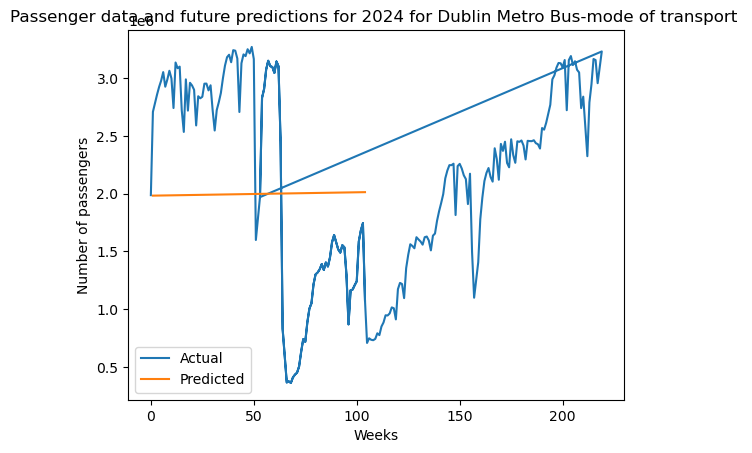

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Load the data into a Pandas DataFrame
data = pd.read_csv('Transport_Dublin_Metro_Bus.csv')

# Pivot the DataFrame to have modes of transport as columns and weeks of the year as rows
data = data.pivot( columns='Mode of Transport', values='VALUE')

# Update the index to include the weeks of 2024
data = data.reindex(list(data.index) + list(range(53, 105)), fill_value=None)

# Create separate DataFrames for each mode of transport
Bus_data = data[['Dublin Metro Bus']]


# Drop rows with missing values
data.dropna(inplace=True)
# Drop rows with missing values
Bus_data.dropna(inplace=True)

# Create a linear regression model for each mode of transport
Bus_model = LinearRegression()

# Fit the models using the data
Bus_model.fit(Bus_data.index.values.reshape(-1, 1), Bus_data.values.reshape(-1, 1))


with open('metro_bus_model.pkl', 'wb') as f:
    pickle.dump(Bus_model, f)


# Predict the number of passengers for the next 52 weeks, which includes weeks of 2024
Bus_predictions = Bus_model.predict([[i] for i in range(1, 53+52)])

# Print the predictions for weeks of 2024
print("Dublin Metro Bus predictions for 2024:")
for i in range(52, len(Bus_predictions)):
    print(f"Week {i-51}: {int(round(Bus_predictions[i][0]))}")
    

        
import matplotlib.pyplot as plt

# Plot the actual rail passenger data
plt.plot(data.index, data['Dublin Metro Bus'], label='Actual')

# Plot the predicted rail passenger data for 2024
plt.plot(range(1, 53+52), Bus_predictions, label='Predicted')

# Add labels and legend
plt.xlabel('Weeks')
plt.ylabel('Number of passengers')
plt.title('Passenger data and future predictions for 2024 for Dublin Metro Bus-mode of transport ')
plt.legend()

# Show the plot
plt.show()

